# Simulation using Python 2
### Monte Carlo Simulation
[Numpy Random website](https://docs.scipy.org/doc/numpy-1.14.1/reference/routines.random.html)

In [2]:
#Runs these import commands
import numpy.random as rnd
import numpy as np
import matplotlib.pyplot as plt

**Scenario M1: Estimate PI**

Consider a quarter circle inscribed inside a unit square.  Radius of cirle is 1.

$Area_{quartercircle} = \pi /4$ and $Area_{square} = 1$

Now, suppose we randomly sample points, then $Area_{quartercircle} \approx \text{number_of_points_inside_circle}$

$\pi = 4*$ number_of_points_inside_circle / n


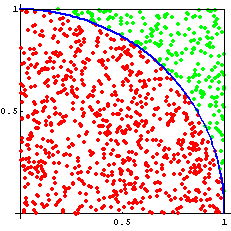


**Algorithm: **
```
for i in range(n):
  Generate x ~ Unif[0,1]
  Generate Y ~ Unif[0,1]
  if (x^2 + y^2) <=1:
    count_in_circle =  count_in_circle + 1

Estimate PI as 4*count_in_circle/n
```

In [ ]:
#Write your code here
n=50000
count_in_circle=0
for i in range(n):

  if ((rnd.uniform())**2 + (rnd.uniform())**2 <=1):
    count_in_circle =  count_in_circle + 1

print((4*count_in_circle)/n)


3.14304


**Scenario M2** A project consists of three tasks: A, B and C. Task A and B can be done in parallel, while C can being only after A and B are completed. The time for task A, is exponentially distributed with mean 10 hours; the time for task B is uniformly distributed between 6 and 14 hours; and the time for task C, is normally distributed with mean 10 hours and std. dev. 3.
What is the probability that the project will be completed within 22 hours?

*Algorithm*
```
for i in range(n):
  Generate A ~ Expo(mean=10 hours)
  Generate B ~ Unif[6, 14]
  Generate C ~ Normal(mean=10, s.d=3)
  Totaltime = max(A,B) + C
  if Totaltime <= 22:
    count = count + 1

Estimate Probability as count /n
```

In [ ]:
#Write your code here
n=5000
count = 0
for i in range(n):
  a=float(rnd.exponential(10))
  b=float(rnd.uniform(6,14))
  c=float(rnd.normal(10,3))
  total_time=max(a,b)+c
  if total_time <=22:
    count=count+1
print(count/n)

0.4998


=.**Scenario M3**

Consider the maze shown. There are 3 cells (Cell 1, Cell 2, Cell 3) and two deadly and permanent outcomes (Death by poison and Death by drowning). In each time step, the rat enters a Cell i, and then exits the cell by picking one of the doors (shown as gaps in the figure) at random. Rat is initially in Cell 1. Answer the following using Monte Carlo Simulation.
(a) Estimate the probability that the rat dies by poison.
(b) What is the expected duration the rat lives?

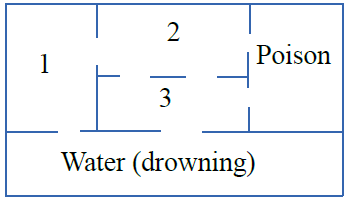

*Algorithm*
```
StepsInRounds=[]
Poisoncount = 0

for i in range(n): #We will simulate rat movement for n rounds.
  currentCell=1
  timestep=0
  while (currentCell not in [4, 5]):
    timestep = timestep + 1
    if currentCell == 1:
      #choose cell 1 or 5 randomly  #5 can indicate Water cell
    elif currentCell == 2:
      #choose cell 1 or 3 or 4 #4 can indicate Poison cell
    else: #currentCell is 3
      #choose cell 2 or 4 or 5
  
    if currentCell == 4:
      Poisoncount = Poisoncount+1

  StepsInRounds.append(timestep)

##print the results
```


In [ ]:
StepsInRounds=[]
Poisoncount=0
n=10000
for i in range(n):
  currentcell=1
  timestep=0
  while (currentcell not in [4,5]):
    timestep = timestep+1
    if currentcell ==1:
      currentcell=rnd.choice([2,5])
    elif currentcell==2:
      currentcell=rnd.choice([1,3,4])
    else :
      currentcell=rnd.choice([2,4,5])
    if currentcell==4:
      Poisoncount =Poisoncount+1

  StepsInRounds.append(timestep)
print(Poisoncount)
print("probability :",Poisoncount/n)
print("average step:",np.mean(StepsInRounds))

3124
probability : 0.3124
average step: 2.1811


**Exercise**

E1. Consider the maze shown above. There are 3 cells (Cell 1, Cell 2, Cell 3) and two deadly and permanent outcomes (Death by poison and Death by drowning). When rat enters Cell i, he wanders around within the cell for Xi minutes where Xi is Gamma(4, 3i) , and then exits the cell by picking one of the doors (shown as gaps in the figure) at random. Rat is initially in Cell 1. Answer the following using Monte Carlo Simulation.
(a) Estimate the probability that the rat dies by poison.
(b) What is the expected duration the rat lives?


In [ ]:
from re import X
StepsInRounds=[]
Poisoncount=0
watercount=0
n=10000
min1=[]
min2=[]
min3=[]

for i in range(n):
  currentcell=1
  timestep=0
  while (currentcell not in [4,5]):
    timestep = timestep+1
    if currentcell ==1:

      currentcell=rnd.choice([2,5])
      x1=rnd.gamma(4,3)
      min1.append(x1)
    elif currentcell==2:

      currentcell=rnd.choice([1,3,4])
      x2=rnd.gamma(4,6)
      min2.append(x2)
    elif currentcell==3 :

      currentcell=rnd.choice([2,4,5])
      x3=rnd.gamma(4,9)
      min3.append(x3)
    else:
      watercount+=watercount
    if currentcell==4:
      Poisoncount =Poisoncount+1


  StepsInRounds.append(timestep)
total_time=sum(min1)+sum(min2)+sum(min3)
#print(Poisoncount)
print("probability of dying due to poison :",Poisoncount/n)
print("average step:",np.mean(StepsInRounds))
print("Estimate Time IN MINUTES: ",total_time/n)



probability of dying due to poison : 0.3083
average step: 2.1432
Estimate Time IN MINUTES:  39.47947230085956



E2. Newspaper vendor at a railway station buys newspaper at Rs. 3.50 and sells it at Rs.4.50. At the end of the day, the unsold newspapers are sold to raddhiwala for Rs.0.25. Estimate the xpected profit if the vendor buys 40 newspapers.

Compare the results when:

*   Demand for newspaper is Poisson random variable with mean 50
*   Demand for newspaper is Normal random variable with mean 50 & s.d. 5

In [4]:
#POISSON DISTRIBUTION
n=40
days=365
rnd.seed(30)
by=float(3.50)
sell=float(4.50)
pr1=[]
for i in range(days):
  demand=int(rnd.poisson(50))
  if demand <n:
    sell1=demand*sell
    remain=n-demand
    remain_sell=remain*0.25
    profit=sell1+remain_sell-n*(3.5)
  else:
    sell2=n*4.50
    profit=sell2-n*(3.5)

  pr1.append(profit)

#NORMAL DISTRIBUTION
pr2=[]
for i in range(days):
    demand=int(rnd.normal(50,5))
    if demand < n:
      profit_normal = (demand*4.5 +(n-demand)*0.25 ) -n*3.5
      pr2.append(profit_normal)
    else:
      profit_normal =  n
      pr2.append(profit_normal)


print("PROFIT IN POISSON DISTRIBUTON = ",np.mean(pr1))
print("PROFIT IN NORMAL DISTRIBUTION = ",np.mean(pr2))

PROFIT IN POISSON DISTRIBUTON =  38.76575342465753
PROFIT IN NORMAL DISTRIBUTION =  39.83698630136986
